In [2]:
import  plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pickle
from collections import OrderedDict
from math import pi

In [19]:
exp_name = 'trajectories_test/pom_100000'
exp_name = 'trajectories_const_farmland/pom_100000_10rep'
outdir = '../../outputs/{}'.format(exp_name)

In [21]:
fits_all = np.load('{}/fits_raw.npz'.format(outdir), allow_pickle=True)['data']
fits = fits_all[:,:,0:2]
vals = fits_all[:,:,2:]

## All models

In [22]:
## create sankey diagram
fit_flat = fits.reshape((fits.shape[0]*fits.shape[1], fits.shape[2]))
# fit_flat[:,0] = 1
n_orig = fit_flat.shape[0]
n_feas = np.sum(fit_flat[:,0])
n0 = np.sum(fit_flat[:,0] * (fit_flat[:,1]==0))
n1 = np.sum(fit_flat[:,0] * (fit_flat[:,1]==1))
n2 = np.sum(fit_flat[:,0] * (fit_flat[:,1]==2))
n3 = np.sum(fit_flat[:,0] * (fit_flat[:,1]==3))
nneg = np.sum(fit_flat[:,0] * (fit_flat[:,1]==-1))


fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["all", "feasible", "infeasible", "s+e+", "s+e-", "s-e+", "s-e-","none"],
      color = ['green','green','black','blue','blue','blue','blue','black']
    ),
    link = dict(
      source = [0, 0, 1, 1, 1, 1, 1], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [1, 2, 3, 4, 5, 6, 7],
      value = [n_feas, n_orig-n_feas, n0, n1, n2, n3, nneg]
  ))])

fig.update_layout(title_text='Efficiency of trajectory classification', font_size=10, width=500, height=500)

In [23]:
v = vals.reshape((vals.shape[0]*vals.shape[1], vals.shape[2]))
print('feas_a')
print(np.sum(v[:,0]))
print('feas_b')
print(np.sum(v[:,1]))
# print('stable_som')
# print(np.sum(v[:,4]))
# print('stable_R')
# print(np.sum(v[:,5]))

feas_a
350275
feas_b
984261


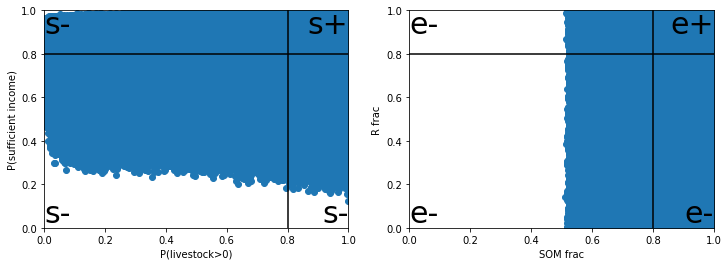

In [28]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
## social
ax = axs[0]
ax.scatter(v[:,2], v[:,3])
ax.set_xlabel('P(livestock>0)')
ax.set_ylabel('P(sufficient income)')
ax.axhline(0.8, color='k')
ax.axvline(0.8, color='k')
ax.text(0,0,'s-',transform=ax.transAxes, ha='left',va='bottom', fontsize=30)
ax.text(1,0,'s-',transform=ax.transAxes, ha='right',va='bottom', fontsize=30)
ax.text(0,1,'s-',transform=ax.transAxes, ha='left',va='top', fontsize=30)
ax.text(1,1,'s+',transform=ax.transAxes, ha='right',va='top', fontsize=30)
ax.set_xlim([0,1])
ax.set_ylim([0,1])

## enviro
ax = axs[1]
ax.scatter(v[:,4], v[:,5])
ax.set_xlabel('SOM frac')
ax.set_ylabel('R frac')
ax.axhline(0.8, color='k')
ax.axvline(0.8, color='k')
ax.text(0,0,'e-',transform=ax.transAxes, ha='left',va='bottom', fontsize=30)
ax.text(1,0,'e-',transform=ax.transAxes, ha='right',va='bottom', fontsize=30)
ax.text(0,1,'e-',transform=ax.transAxes, ha='left',va='top', fontsize=30)
ax.text(1,1,'e+',transform=ax.transAxes, ha='right',va='top', fontsize=30)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
fig.savefig('{}/s_e_scatters.png'.format(outdir), dpi=200)

## Selected models

In [25]:
sel_ixs = pickle.load(open(outdir+'/selected_ixs.pkl', 'rb'))
sel_param = pickle.load(open(outdir+'/selected_params.pkl', 'rb'))

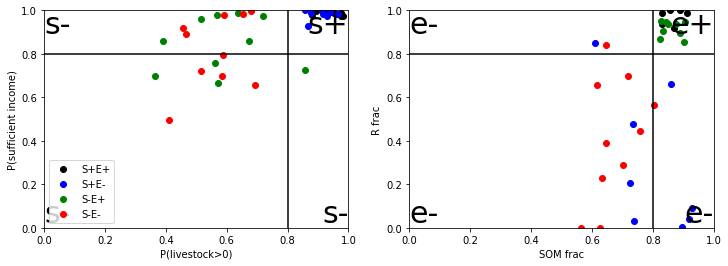

In [27]:
## plot the S and E values
val_mean = np.mean(vals, axis=0)

fig, axs = plt.subplots(1,2,figsize=(12,4))
colors = OrderedDict({'S+E+' : 'k', 'S+E-' : 'b', 'S-E+' : 'g', 'S-E-' : 'r'})
cats = list(colors.keys())
for c, cat in enumerate(cats):
    ## social
    axs[0].scatter(val_mean[sel_ixs[str(c)],2], val_mean[sel_ixs[str(c)],3], color=colors[cat], label=cat)
    ## environmental
    axs[1].scatter(val_mean[sel_ixs[str(c)],4], val_mean[sel_ixs[str(c)],5], color=colors[cat], label=cat)

ax = axs[0]    
ax.set_xlabel('P(livestock>0)')
ax.set_ylabel('P(sufficient income)')
ax.axhline(0.8, color='k')
ax.axvline(0.8, color='k')
ax.text(0,0,'s-',transform=ax.transAxes, ha='left',va='bottom', fontsize=30)
ax.text(1,0,'s-',transform=ax.transAxes, ha='right',va='bottom', fontsize=30)
ax.text(0,1,'s-',transform=ax.transAxes, ha='left',va='top', fontsize=30)
ax.text(1,1,'s+',transform=ax.transAxes, ha='right',va='top', fontsize=30)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.legend()

ax = axs[1]
ax.set_xlabel('SOM frac')
ax.set_ylabel('R frac')
ax.axhline(0.8, color='k')
ax.axvline(0.8, color='k')
ax.text(0,0,'e-',transform=ax.transAxes, ha='left',va='bottom', fontsize=30)
ax.text(1,0,'e-',transform=ax.transAxes, ha='right',va='bottom', fontsize=30)
ax.text(0,1,'e-',transform=ax.transAxes, ha='left',va='top', fontsize=30)
ax.text(1,1,'e+',transform=ax.transAxes, ha='right',va='top', fontsize=30)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
fig.savefig('{}/s_e_scatters_selected_mods.png'.format(outdir), dpi=200)

### S-E variables as parallel plots

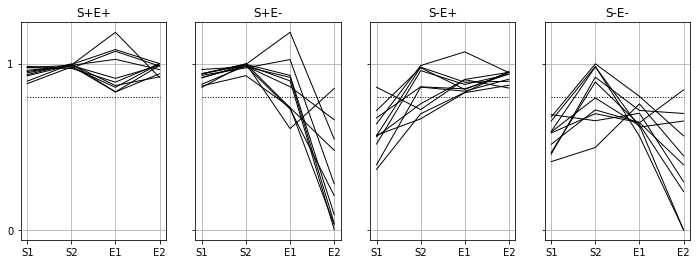

In [35]:
threshs = [0.8,0.8,0.8,0.8]

fig, axs = plt.subplots(1,4,figsize=(12,4), sharey=True)
cats = list(colors.keys())
xs = np.arange(4)
for c, cat in enumerate(cats):
    val_cat = val_mean[sel_ixs[str(c)]]
    for v in range(val_cat.shape[0]):
        axs[c].plot(xs, val_cat[v,[2,3,4,5]], lw=1, color='k')
        
    # plot the threshold
    axs[c].plot(xs, threshs, ls=':',color='k', lw=1)
    # format
    axs[c].set_xticks(xs)
    axs[c].set_xticklabels(['S1','S2','E1','E2'])
    axs[c].set_title(cat)
    axs[c].yaxis.set_major_locator(plticker.MultipleLocator(base=1))
    axs[c].grid(which='major', axis='both', linestyle='-')

### spider diagrams

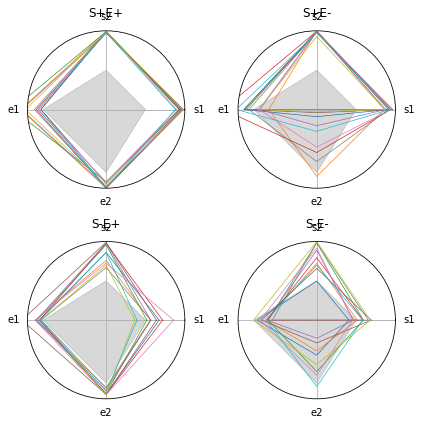

In [30]:
cats = ['S+E+','S+E-','S-E+','S-E-']
labels = ['s1','s2','e1','e2']
sv = 0.5
ev = 0.8

# init the plot
fig = plt.figure(figsize=(6,6))
axs = []
for i in [1,2,3,4]:
    ax = fig.add_subplot(2,2,i,polar=True)
    angles = np.array([0,90,180,270,360]) * (2*pi/360)
    ax.set_xticks(angles)
    ax.set_xticklabels(labels)
    ax.set_yticks([])
    axs.append(ax)

# add data
for c, cat in enumerate(cats):
    val_cat = val_mean[sel_ixs[str(c)]]
    # fill in the bad zones
    axs[c].fill(angles, [sv,sv,ev,ev,sv], color='0.5', alpha=0.3)
    for v in range(val_cat.shape[0]):
        axs[c].plot(angles, val_cat[v,[2,3,4,5,2]], lw=0.7)
    axs[c].set_title(cats[c])
    axs[c].set_ylim([0,1])
    
fig.tight_layout()
fig.savefig('{}/spiders.png'.format(outdir), dpi=200)

## parameter values

In [31]:
calib_vars = pd.read_csv(outdir + '/calib_vars.csv', index_col=0)
calib_vars

,key1,key2,min_val,max_val,as_int
0,land,rain_cropfail_low_SOM,0.00,0.50,False
1,land,fast_mineralization_rate,0.25,0.75,False
2,agents,livestock_init,0.00,6.00,True
3,agents,n_yr_smooth,1.00,6.00,True
4,agents,living_cost_pp,50.00,2000.00,True
5,agents,living_cost_min_frac,0.20,0.80,False
6,agents,ag_labor_rqmt,0.50,3.00,False
7,agents,ls_labor_rqmt,0.02,1.00,False
8,agents,savings_acct,0.00,2.00,True
9,market,farm_cost,0.00,1000.00,True


In [32]:
# scale the selected params
param_sc = {}
mx = np.array(calib_vars.max_val)
mn = np.array(calib_vars.min_val)
for k, v in sel_param.items():
    param_sc[k] = (v-mn)/(mx-mn)

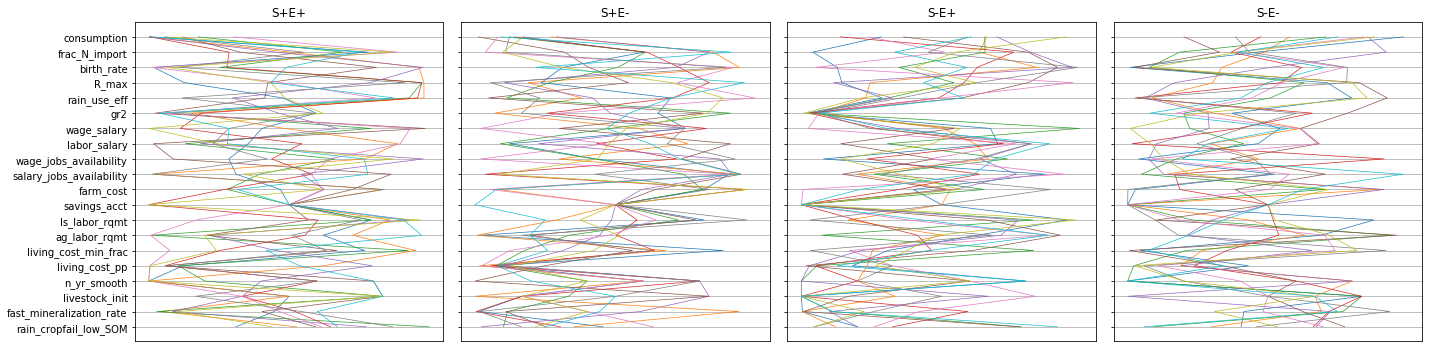

In [33]:
cats = ['S+E+','S+E-','S-E+','S-E-']
fig, axs = plt.subplots(1,4, figsize=(20,5), sharex=True, sharey=True)
axs = axs.flatten()
ys = np.array(calib_vars.index)

for c, cat in enumerate(cats):
    for p in range(param_sc[str(c)].shape[0]):
        axs[c].plot(param_sc[str(c)][p], ys, lw=0.7)
        
for a, ax in enumerate(axs):
    ax.set_title(cats[a])
    ax.set_xticks([])
    ax.yaxis.set_major_locator(plticker.MultipleLocator(base=1))
    ax.grid(which='major', axis='both', linestyle='-')
for ax in [axs[2], axs[3]]:
    ax.set_yticks(ys)
    ax.set_yticklabels(calib_vars.key2)
    

# Add the grid

    
fig.tight_layout()
fig.savefig(outdir+'/param_scatters.png')

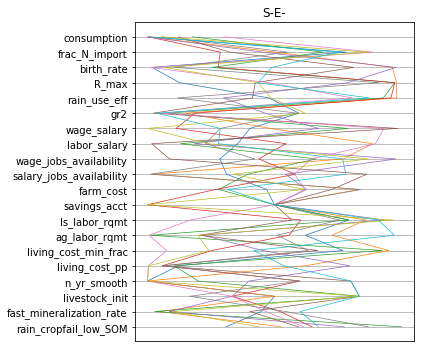

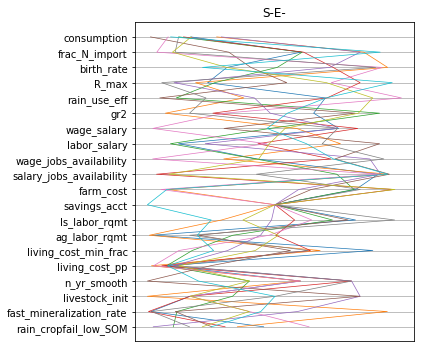

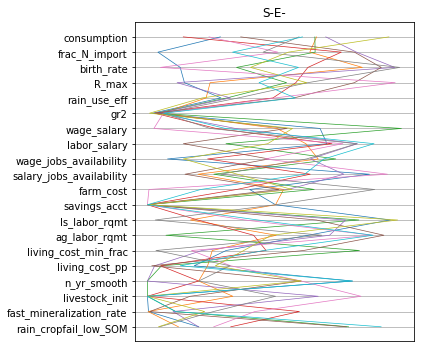

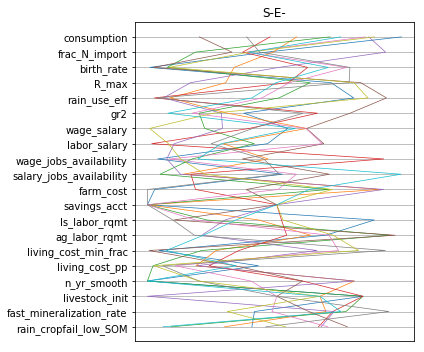

In [34]:
cats = ['S+E+','S+E-','S-E+','S-E-']

ys = np.array(calib_vars.index)

for c, cat in enumerate(cats):
    fig, ax = plt.subplots(1,1, figsize=(6,5))
    for p in range(param_sc[str(c)].shape[0]):
        ax.plot(param_sc[str(c)][p], ys, lw=0.7)
        

    ax.set_title(cats[a])
    ax.set_xticks([])
    ax.yaxis.set_major_locator(plticker.MultipleLocator(base=1))
    ax.grid(which='major', axis='both', linestyle='-')

    ax.set_yticks(ys)
    ax.set_yticklabels(calib_vars.key2)
    fig.tight_layout()
    fig.savefig(outdir+'/param_scatter_{}.png'.format(cat), dpi=400)
    
